# Titanic: Machine Learning from Disaster

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CURR_PATH = os.path.curdir
sys.path.append(os.path.join(CURR_PATH, '../titanic-classes/'))

In [2]:
# Read data from file and load into pandas dataframe
data_path = '../data/'
df_train = pd.read_csv(os.path.join(data_path, 'train.csv'))
df_test = pd.read_csv(os.path.join(data_path, 'test.csv'))

### Raw data analysis

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
display(df_train.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# We drop the irrelevant fields which do not aid in training the data: 
# Name, PassengerId
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Inference from above raw data**

- More than 75% of data does not have cabin info, we can remove it from the list of features
- We need to replace the null values in Age and Embarked
- We do not need the feature Name, however we can use the Title of each person to gain insight
- We can safely drop PassengerId, Ticket number as they are not relevant to predict

## Data cleaning

In [7]:
from data_cleaner import TitanicCleaner

We import **TitanicCleaner** class. It has the following methods:

- remove_irrelavant_features()
- extract_titles()
- replace_null_embarked()
- replace_null_age()
- display_head(number_of_rows: int)

See the _src/titanic-classes/data_cleaner.py_ for more info

In [8]:
# We initialize an object of Titanic Cleaner defined under 
df_tit_train = df_train
titanic_train = TitanicCleaner(df_tit_train)

We get rid of irrelavant features:
- PassengerId, Ticket number are either random or are of no significance to predicting the final outcome.
- And since more than 75% of Cabin number values are missing, we can remove this feature as well. 

In [9]:
# Removes the features PassengerId, Ticket number, Cabin number
titanic_train.remove_irrelavant_features()
titanic_train.display_head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


---
Name also might not be a factor in the prediction. However, we can extract the title from each person's name which might not just give us an insight into Age and Status.

In [10]:
# Next we create feature called Title, based on each person's name. We drop the feature 'Name'
titanic_train.extract_titles()
titanic_train.display_head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


***
The features Age and Embarked have some null values.

- We guess the age based on the Title. We find median age of each Title group and assign that value
- We replace null values in Embarked with the mode (highest frequency of value)

In [11]:
# We replace null values in Embarked
titanic_train.replace_null_embarked()
print("")

In [12]:
# We replace null values in Age
df_cleaned = titanic_train.replace_null_age()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


## Data analysis

### Exploratory data analysis

Before we normalize the data, we find if the features we have are relavant to the target. And perform some feature engineering if required.

**(i) Does gender of a person play a role in passenger's survival?**

From the graph we can confirm that female gender has a higher probablility of survival

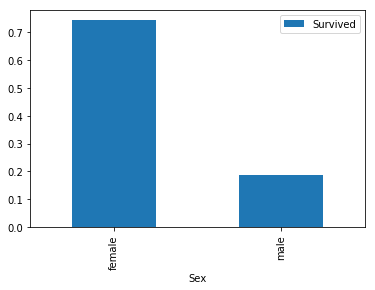

In [13]:
df_cleaned[['Sex', 'Survived']]\
    .groupby(by='Sex', as_index=True)\
    .mean()\
    .sort_values(by='Survived', ascending=False)\
    .plot(kind='bar')

**(ii) Does Passenger class affect passenger's survival?**

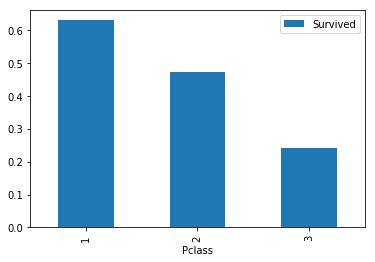

In [14]:
df_cleaned[['Pclass', 'Survived']]\
    .groupby(by='Pclass', as_index=True)\
    .mean()\
    .sort_values(by='Survived', ascending=False)\
    .plot(kind='bar')

**(iii) Does the place of Embarkment affect a passegenger's survival?**

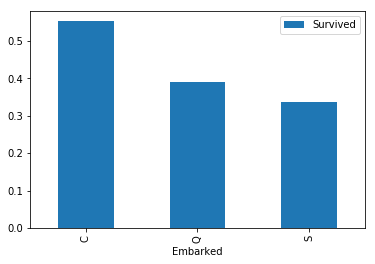

In [15]:
df_cleaned[['Embarked', 'Survived']]\
    .groupby(by='Embarked', as_index=True)\
    .mean()\
    .sort_values(by='Survived', ascending=False)\
    .plot(kind='bar')

**(iv) Does having parents or children onboard affected a passenger's survival?**

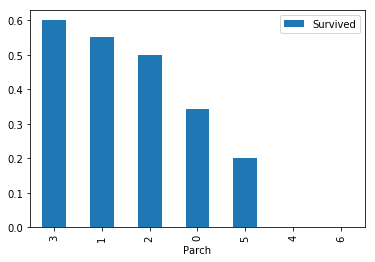

In [16]:
df_cleaned[['Parch', 'Survived']]\
    .groupby(by='Parch', as_index=True)\
    .mean()\
    .sort_values(by='Survived', ascending=False)\
    .plot(kind='bar')

**(v) Does having siblings onboard affected a passenger's survival?**

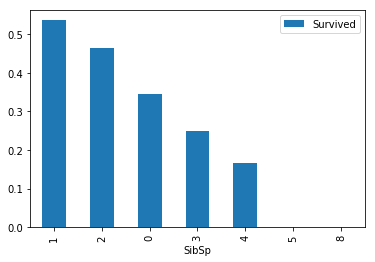

In [17]:
df_cleaned[['SibSp', 'Survived']]\
    .groupby(by='SibSp', as_index=True)\
    .mean()\
    .sort_values(by='Survived', ascending=False)\
    .plot(kind='bar')

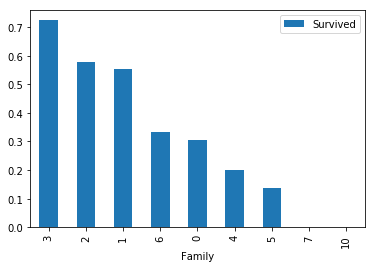

In [18]:
# We combine the number of parents/children feature and number of siblings,
# by adding them up together and analyze again
df_cleaned['Family'] = df_cleaned.Parch + df_cleaned.SibSp
df_cleaned[['Family', 'Survived']]\
    .groupby(by='Family', as_index=True)\
    .mean()\
    .sort_values(by='Survived', ascending=False)\
    .plot(kind='bar')

****

We combine number of siblings and number of parents/children features to make a feature called Family, since our analysis above does show a correlation between these features and survival.

In [19]:
titanic_train.combine_family_features()
titanic_train.get_dummies_categorical_features()

,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,7.2500,1,1,0,1,0,1,0,0
1,1,1,38.0,71.2833,1,0,0,0,0,0,1,0
2,1,3,26.0,7.9250,0,0,0,1,1,0,0,0
3,1,1,35.0,53.1000,1,0,0,1,0,0,1,0
4,0,3,35.0,8.0500,0,1,0,1,0,1,0,0
5,0,3,30.0,8.4583,0,1,1,0,0,1,0,0
6,0,1,54.0,51.8625,0,1,0,1,0,1,0,0
7,0,3,2.0,21.0750,4,1,0,1,0,0,0,0
8,1,3,27.0,11.1333,2,0,0,1,0,0,1,0
9,1,2,14.0,30.0708,1,0,0,0,0,0,1,0


---
We bin the age values based on the following graph. We can categorize them in groups of 
- Child - 0-15 - 0
- Adult - 16-50 - 1
- Senior - 50+ - 2

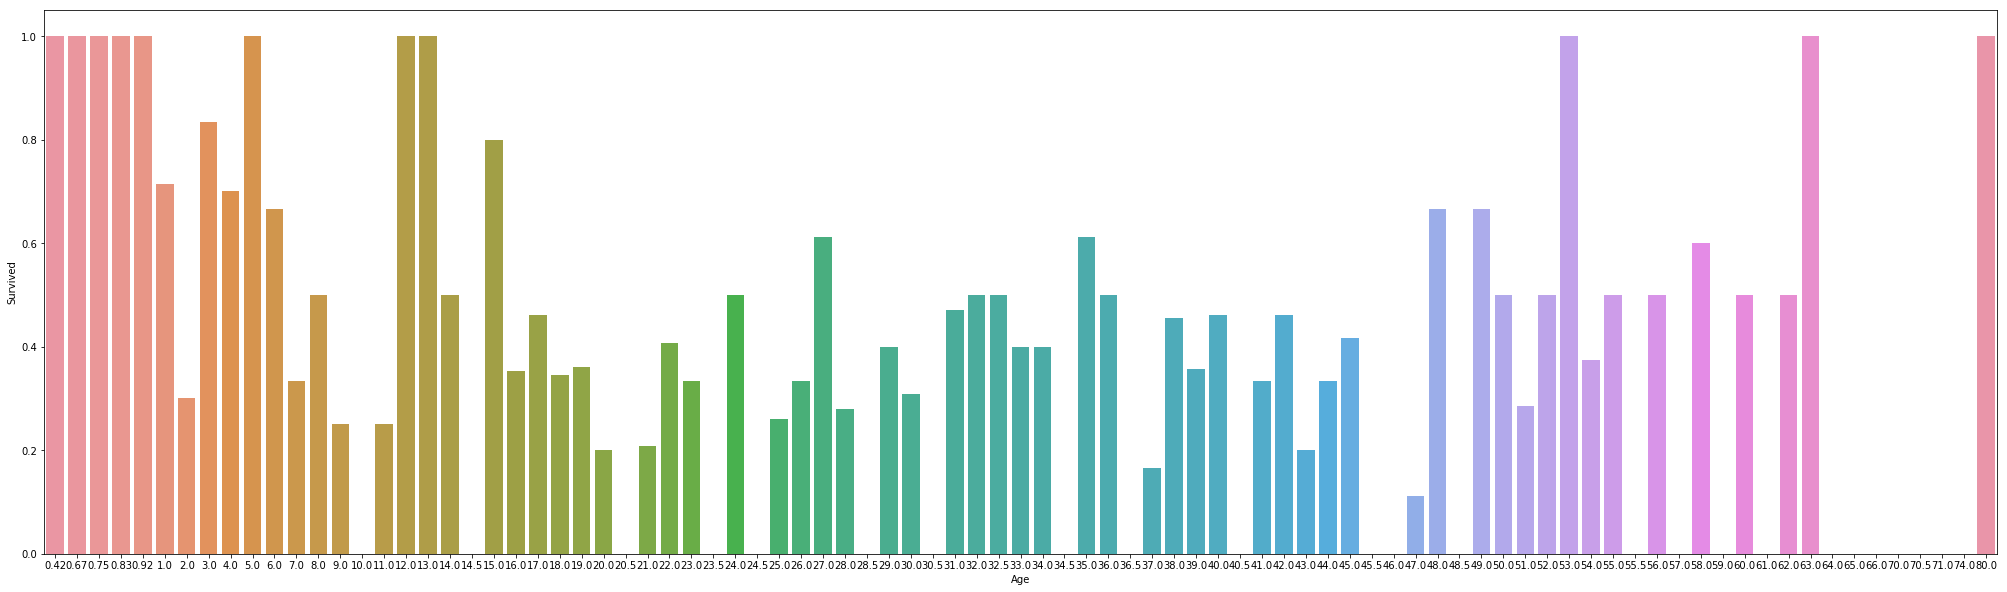

In [20]:
plt.figure(figsize=(35,10))
sns.barplot(df_cleaned['Age'],df_cleaned['Survived'], ci=None)

In [22]:
# We bin the age into three groups
titanic_train.bin_age(age_group=[0, 15, 50, 100], group_names=[0, 1, 2])
titanic_train.display_head()

,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,7.2500,1,1,0,1,0,1,0,0
1,1,1,0,71.2833,1,0,0,0,0,0,1,0
2,1,3,0,7.9250,0,0,0,1,1,0,0,0
3,1,1,0,53.1000,1,0,0,1,0,0,1,0
4,0,3,0,8.0500,0,1,0,1,0,1,0,0


---
We want to bin the Fare feature, before we do so, we analyze on what criteria to bin them. During our analysis we found that fare does not directly correlate with the Survival prediction. So we plan to combine Fare and Pclass.

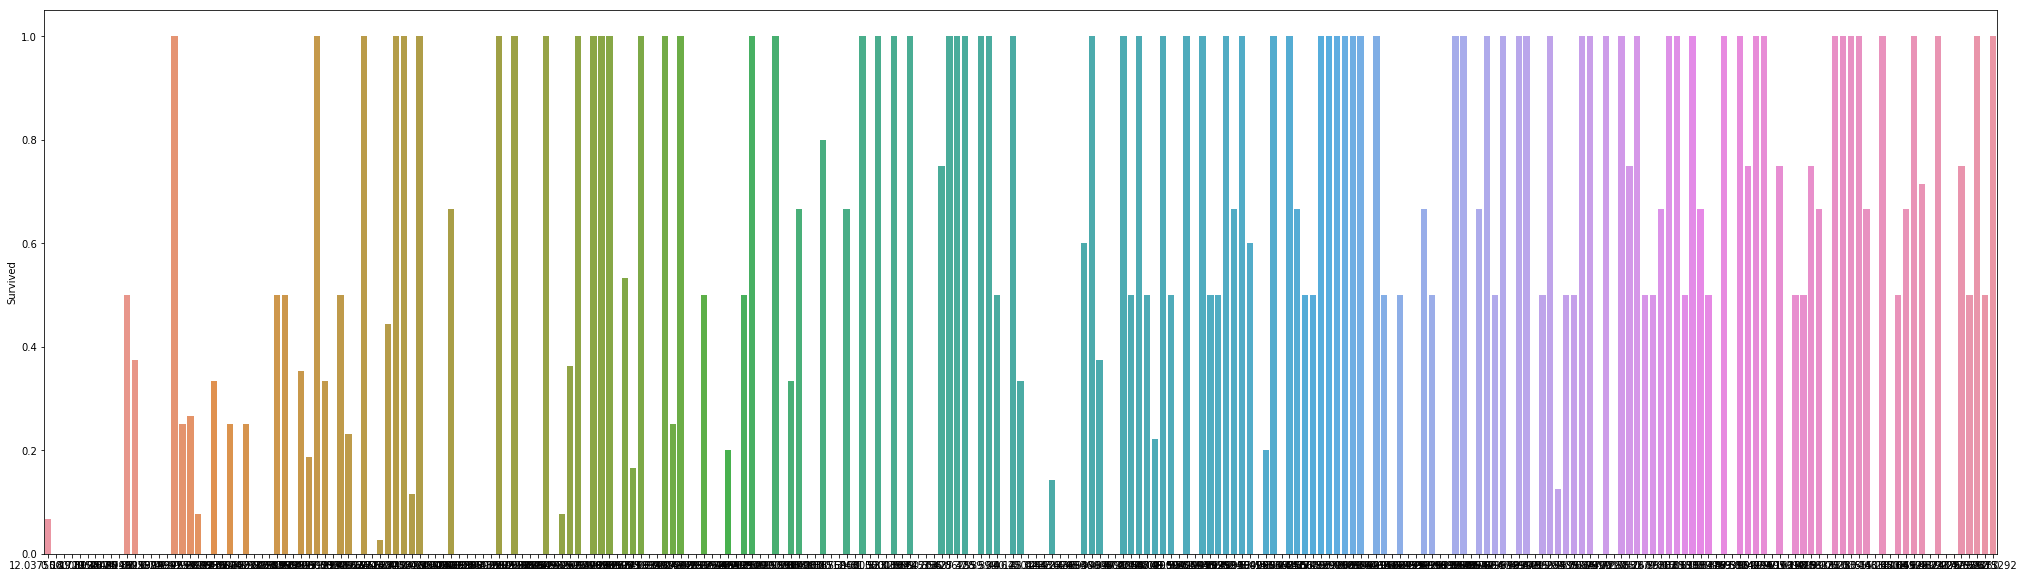

In [26]:
plt.figure(figsize=(35,10))
pd.cut(
sns.barplot((df_cleaned['Fare'] * df_cleaned['Pclass']),df_cleaned['Survived'], ci=None)

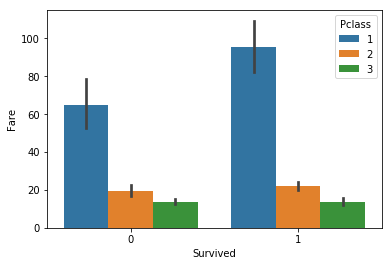

In [25]:
sns.barplot(df_cleaned['Survived'], df_cleaned['Fare'], df_cleaned['Pclass'])